In [1]:
import numpy as np
import os 
import random 
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm 

import torch
import torch.nn as nn 
import torch.optim as optim 
from torchvision import datasets, transforms

# Activation functions
- Mathematical functions that determine output of neural network
- The function is attached to each neuron in the network deciding if the neron should be activated (fired) or not based on if it is linked to the prediction 
- Activation functions must also help to normalixe output of each neuron

- Activation functions must be computationally efficient which uses calculations from 1000s or millions of neurons.
- Backpropagation trains the model by improving hyperparameters through increased computational strain on the activation function

In [2]:
# Define the Sigmoid and ReLU functions

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

# get the derivative of a function using the central difference method to estimate the gradient
# eps is EPSILON which is the step size or learning rate
def derivative(f, x, eps=0.000001):
    return (f(x + eps) - f(x - eps)) / (2 * eps)

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

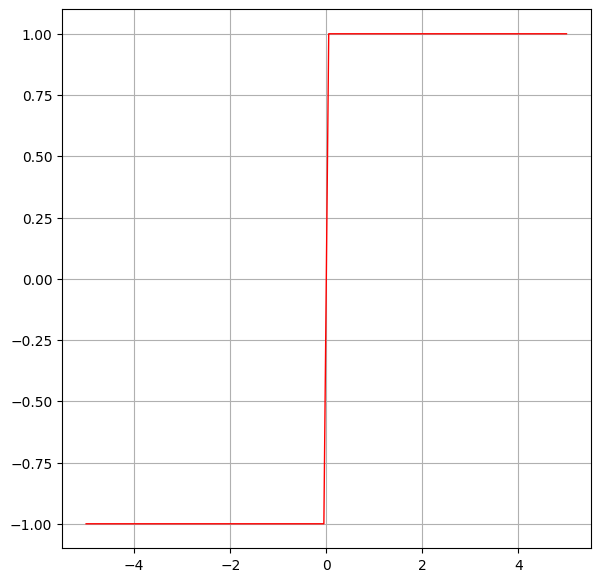

In [3]:
# Return a vector that contains 100 evenly spaced numbers over a specified interval [-5, 5]
# ( we can also try 5, 10, 1000)

x = np.linspace(-5, 5, 100)

print(x)

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
# np.sign() is -1 if negative , 0 if 0 and 1 if positive per element, and the graph is shown below
plt.plot(x, np.sign(x), "r-", linewidth=1, label="Step")
plt.grid(True)

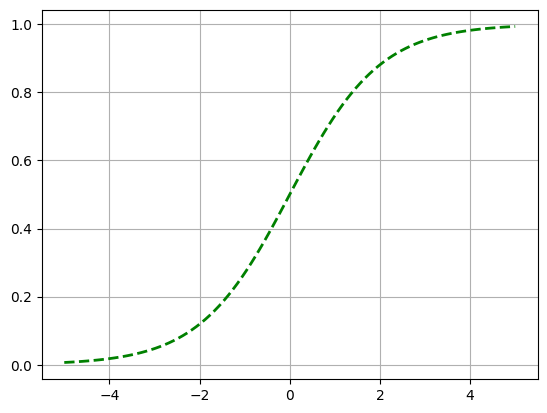

In [4]:
plt.plot(x, sigmoid(x), "g--", linewidth=2, label="Sigmoid")
plt.grid(True)

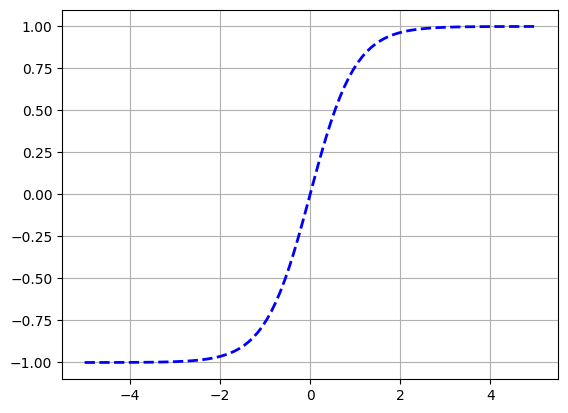

In [5]:
plt.plot(x, np.tanh(x), "b--", linewidth=2, label="Tanh")
plt.grid(True)

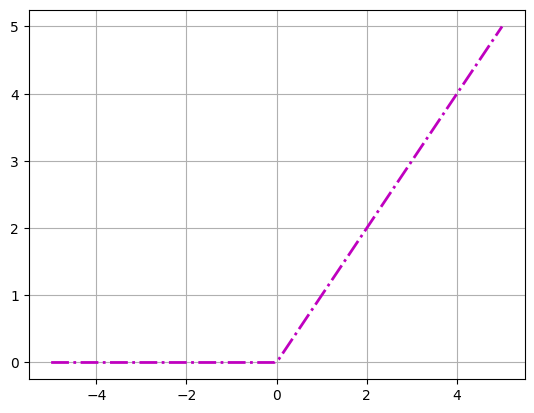

In [6]:
plt.plot(x, relu(x), "m-.", linewidth=2, label="ReLU")
plt.grid(True)

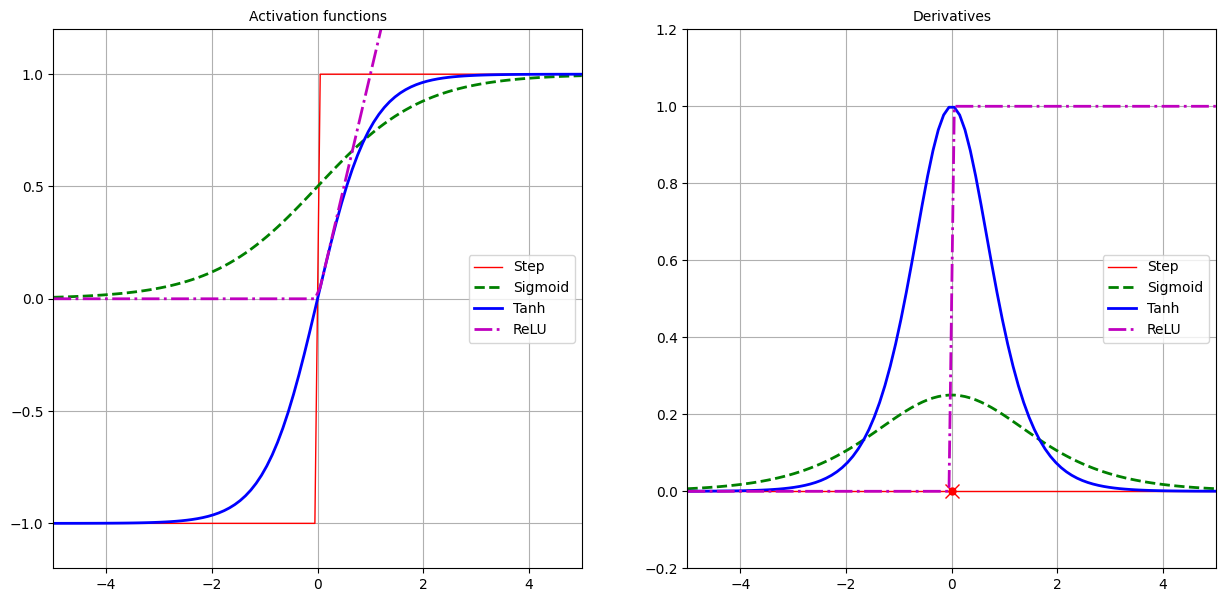

In [7]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.plot(x, np.sign(x), "r-", linewidth=1, label="Step")
plt.plot(x, sigmoid(x), "g--", linewidth=2, label="Sigmoid")
plt.plot(x, np.tanh(x), "b-", linewidth=2, label="Tanh")
plt.plot(x, relu(x), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=10)
plt.title("Activation functions", fontsize=10)
plt.axis([-5, 5, -1.2, 1.2]) # args = plt.axis(xmin, xmax, ymin, ymax)

# now we can plot the derivatives of the different activation functions
plt.subplot(1, 2, 2)
plt.plot(x, derivative(np.sign, x), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(x, derivative(sigmoid, x), "g--", linewidth=2, label="Sigmoid")
plt.plot(x, derivative(np.tanh, x), "b-", linewidth=2, label="Tanh")
plt.plot(x, derivative(relu, x), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=10)
plt.title("Derivatives", fontsize=10)
plt.axis([-5, 5, -0.2, 1.2])

# To plot pretty figures, you can change the fontsize and font style
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

plt.show()

In [8]:
# Model/data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Define the transform that converts the data to tensors https://pytorch.org/docs/stable/tensors.html
# ToTensor converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load the data: as MNIST is an inbuilt dataset in pytorch, we can load it using torchvision.datasets
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

x_train, y_train = train_data.data, train_data.targets
x_test, y_test = test_data.data, test_data.targets

# Alwasys check your training and test date before you design the network and train it
print("Training data shape: ", x_train.shape)
print(x_train.shape[0], "train samples \n")

print("Test data shape: ", x_test.shape)
print(x_test.shape[0], "test samples \n")

print("Training label shape: ", y_train.shape)
print(y_train.shape[0], "train labels \n")

print("Test label shape: ", y_test.shape)
print(y_test.shape[0], "test labels \n")

Training data shape:  torch.Size([60000, 28, 28])
60000 train samples 

Test data shape:  torch.Size([10000, 28, 28])
10000 test samples 

Training label shape:  torch.Size([60000])
60000 train labels 

Test label shape:  torch.Size([10000])
10000 test labels 



In [9]:
# Warning: Do not run this code repetivelty as this may cause issues.
# If you do need to rerun this section, run the last section first and then run this section.

# Reshape the training and test data to matrics, each row is an image sample
# A tutorial for ndarray reshape https://www.w3schools.com/python/numpy/numpy_array_reshape.asp
x_train = x_train.view(-1, 28*28)
# x_train = x_train.reshape(-1, 28*28)
x_test = x_test.view(-1, 28*28)

# Convert class labels to one-hot vectors, each row is one
y_train = nn.functional.one_hot(y_train, num_classes=num_classes).numpy()
y_test = nn.functional.one_hot(y_test, num_classes=num_classes).numpy()


# Take 5000 samples from the training data as your validation set
x_valid, x_train = x_train[:5000], x_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

# Check your data again
print("Training data shape:", x_train.shape)
print("Validation data shape:", x_valid.shape)
print("Test data shape:", x_test.shape, "\n")

print("Training label shape:", y_train.shape)
print("Validation label shape:", y_valid.shape)
print("Test label shape:", y_test.shape)
valid_data, train_data = torch.utils.data.random_split(train_data, [5000, 55000])

Training data shape: torch.Size([55000, 784])
Validation data shape: torch.Size([5000, 784])
Test data shape: torch.Size([10000, 784]) 

Training label shape: (55000, 10)
Validation label shape: (5000, 10)
Test label shape: (10000, 10)


## <font color='red'> Task1</font>

**Task 1:**

Create a new MLP model and train it on the MNIST dataset. Try to get more than 95% precision.

**This can be achieved by many ways. For examples:**
* You can try to add more layers.
* You can try the network for more epochs.
* You can try to use the Adam optimiser rather than SGD.
* And more ...


In [14]:
n_inputs = 28*28 # 28x28 pixel grey scale image so 784 pixels per image
n_hidden1 = 256
n_hidden2 = 128
n_hidden3 = 128
n_hidden4 = 128
n_hidden5 = 128
n_outputs = 10

class Network(nn.Module):
    def __init__(self, n_inputs, n_hidden1, n_hidden2, n_hidden3, n_hidden4, n_outputs):
        super(Network, self).__init__()

        # input layer
        self.fc1 = nn.Linear(n_inputs, n_hidden1) # "fc" -> fully connected
        self.relu1 = nn.ReLU()

        # hidden layer 1 - relu activation
        self.fc2 = nn.Linear(n_hidden1, n_hidden2)
        self.relu2 = nn.ReLU()

        # hidden layer 2 - relu activation
        self.fc3 = nn.Linear(n_hidden2, n_hidden3)
        self.relu3 = nn.ReLU()

        self.fc4 = nn.Linear(n_hidden3, n_hidden4)
        self.relu4 = nn.ReLU()

        # output layer
        self.fc5 = nn.Linear(n_hidden4, n_outputs)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        logits = self.fc5(x) # output of predictions
        return logits
    
# Instantiate the model
model = Network(n_inputs, n_hidden1, n_hidden2, n_hidden3, n_hidden4, n_outputs)

print(model)


Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=128, out_features=128, bias=True)
  (relu4): ReLU()
  (fc5): Linear(in_features=128, out_features=10, bias=True)
)


In [15]:
# Now we define loss function : CrossEntropy for classification task
cross_entropy_loss = nn.CrossEntropyLoss()

We have the neural network model, we have the cost function, and now we need to define an SGD optimizer that will tweak the model parameters to minimize the cost function.

In [16]:
# Set HyperParameters and the evaluation metric

# learning_rate = 0.01 # step size
learning_rate = 0.02
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [17]:
# training the model, use data_loader for loading data into the model efficiently

epochs = 6
batch_size = 128

# creating the training, validation and testing datasets
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

# calculate the accuracy given a set of predicted outputs (logits) with the label
def accuracy(output, target):
    prediction = output.argmax(dim=1, keepdim=True)
    correct_output = prediction.eq(target.view_as(prediction)).sum().item()
    return correct_output / len(target) # mean

# loop over epochs
for epoch in range(epochs):
    model.train()

    # running loss and accuracy
    running_loss = 0.0
    running_accuracy = 0.0

    # for loop over the mini batches per epoch
    for inputs, targets in tqdm(train_loader, desc="Epoch-" + str(epoch)):
        # in PyTorch, always set the gradients to ZERO for each mini batch
        optimizer.zero_grad()

        # Forward
        output = model(inputs.view(-1, 28*28))

        # Loss
        loss = cross_entropy_loss(output, targets)

        # Backward
        loss.backward()

        # UPDATE THE MODEL'S PARAMETERS
        optimizer.step()

        # Updating the running loss and accuracy
        running_loss += loss.item()
        running_accuracy += accuracy(output, targets)

    print('Train - Loss: {:.6f}, Accuracy: {:.2f}%'.format(
        running_loss / len(train_loader), running_accuracy / len(train_loader) * 100))
    


    # Validation test set accuracy loop
    model.eval()
    valid_loss = 0
    valid_accuracy = 0
    with torch.no_grad():
        for data, target in valid_loader:
            output = model(data.view(-1, 28*28))
            valid_loss += cross_entropy_loss(output, target).item()
            valid_accuracy += accuracy(output, target)

    print('Validation - Loss: {:.6f}, Accuracy: {:.2f}%\n'.format(
        valid_loss / len(valid_loader), valid_accuracy / len(valid_loader) * 100))
        


Epoch-0: 100%|██████████| 430/430 [00:08<00:00, 50.40it/s]


Train - Loss: 0.419770, Accuracy: 87.53%
Validation - Loss: 0.242047, Accuracy: 93.98%



Epoch-1: 100%|██████████| 430/430 [00:08<00:00, 50.00it/s]


Train - Loss: 0.221882, Accuracy: 94.20%
Validation - Loss: 0.210079, Accuracy: 94.71%



Epoch-2: 100%|██████████| 430/430 [00:09<00:00, 46.67it/s]


Train - Loss: 0.185616, Accuracy: 95.17%
Validation - Loss: 0.277596, Accuracy: 93.79%



Epoch-3: 100%|██████████| 430/430 [00:09<00:00, 46.47it/s]


Train - Loss: 0.191056, Accuracy: 95.13%
Validation - Loss: 0.218144, Accuracy: 94.53%



Epoch-4: 100%|██████████| 430/430 [00:09<00:00, 46.55it/s]


Train - Loss: 0.165776, Accuracy: 95.96%
Validation - Loss: 0.194318, Accuracy: 95.20%



Epoch-5: 100%|██████████| 430/430 [00:09<00:00, 43.41it/s]


Train - Loss: 0.155478, Accuracy: 96.23%
Validation - Loss: 0.226535, Accuracy: 94.73%



In [18]:
# Switch model to evaluation mode
model.eval()

# Perform inference on the test set
y_pred = []
with torch.no_grad():
    for data, _ in test_loader:
        output = model(data.view(-1, 28*28))
        _, predicted = torch.max(output, 1)
        y_pred.extend(predicted.numpy())

# Convert predicted labels to numpy array
y_pred = np.array(y_pred)

# Get the ground truth labels
y_test = test_data.targets.numpy()

# Print predicted and actual classes for the first 100 samples
print("Predicted classes of the first 100 samples:", y_pred[:100])
print("Actual classes of the first 100 samples: ", y_test[:100])

# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)
print("Total accuracy on the test set:", accuracy)

Predicted classes of the first 100 samples: [7 2 1 0 4 1 4 9 8 9 0 6 9 0 1 5 9 7 8 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
Actual classes of the first 100 samples:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
Total accuracy on the test set: 0.9528


# Challenge Part: Tumour classification
We have a dataset containing measurements of breast tumours. This is a classification task.

- Labels:
  - 'B' for benign (noncancerous)
  - 'M' for malignant (cancerous)
- Notes:
  - You can use a loss function related to binary labels
  - Different activation functions might impact your model
  - You could look at feature-wise normalisation, which may help your model's performance, [using utility functions from scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html)

First, please download the dataset from SurreyLearn https://surreylearn.surrey.ac.uk/d2l/le/lessons/252865/lessons/2930200 and upload the COM2028_Week5_Lab_Data.zip file to the file folder of this notebook (left hand side).

In [31]:
import os

print(os.getcwd())

d:\unimodules\yr2sem2\ai\week5\lab


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = "./COM2028_Week5_Lab_Data\\BreastCancerTrain.csv\\"

train_bc = pd.read_csv(file_path)

print(f"Training set sample (target=weight): {train_bc[:10]}")

# Return all columns that are not the target, 'diagnosis', as a numpy array
X_train_bc = train_bc.loc[:, train_bc.columns != 'diagnosis'].values
X_train_bc = torch.from_numpy(X_train_bc)

print('Training sample shape', X_train_bc.shape, '\n Example:', X_train_bc[0])

# Return only the 'diagnosis' column as a numpy array
y_train_bc = train_bc.loc[:, 'diagnosis'].values

# Convert to binary labels
# You need to use the binary cross entropy loss for network training
# https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html
# https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss
# Please read and understand the differences

y_train_bc[y_train_bc == 'M'] = 1
y_train_bc[y_train_bc == 'B'] = 0

# Convert to tensor
y_train_bc = torch.from_numpy(y_train_bc.astype(np.int64))
#print('Training target shape one-hot', y_train_bc.shape, '\n Example:', y_train_bc[0])

# Or, uncomment the code below if you want to use one-hot encoding as shown in the example code
# y_train_bc = nn.functional.one_hot(y_train_bc, num_classes = 2).numpy()
# print('Training target shape one-hot', y_train_bc.shape, '\n Example:', y_train_bc[0])


Training set sample (target=weight):   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         B        13.01         22.22           82.01      526.4   
1         B        14.29         16.82           90.30      632.6   
2         B        14.26         18.17           91.22      633.1   
3         B        11.87         21.54           76.83      432.0   
4         B        13.90         16.62           88.97      599.4   
5         B        11.32         27.08           71.76      395.7   
6         B        12.05         22.72           78.75      447.8   
7         B         9.72         18.22           60.73      288.1   
8         B        12.89         13.12           81.89      515.9   
9         B        14.40         26.99           92.25      646.1   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.06251           0.01938        0.001595             0.001852   
1          0.06429           0.02675        0.007

In [66]:
# Split data into training and temporay set (for validation and testing)
# Split the data into training and temporary set (80% training, 20% temporary)
# 80% training, 20% temporary
X_train, X_temp, y_train, y_temp = train_test_split(X_train_bc, y_train_bc, test_size=0.2, random_state=42)


In [67]:
# Further Split Temporary Set into Validation and Test Sets
# Now split the X_temp and y_temp into validation and test sets:
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [69]:
# Print shapes of all sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_validation.shape, y_validation.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: torch.Size([375, 30]) torch.Size([375])
Validation set shape: torch.Size([47, 30]) torch.Size([47])
Test set shape: torch.Size([47, 30]) torch.Size([47])


In [62]:
# Your code here: build your NN classifier
n_inputs = 41
n_hidden1 = 256
n_hidden2 = 128
n_outputs = 2

class BCNetwork(nn.Module):
    def  __init__(self, n_inputs, n_hidden1, n_hidden2, n_outputs):
        super(BCNetwork, self).__init__()

        self.fc1 = nn.Linear(n_inputs, n_hidden1)
        self.relu1 = nn.ReLU()

        self.fc2 = nn.Linear(n_hidden1, n_hidden2)
        self.relu2 = nn.ReLU()

        self.fc3 = nn.Linear(n_hidden2, n_outputs)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        logits = self.fc3(x)
        return logits

model = BCNetwork(n_inputs, n_hidden1, n_hidden2, n_outputs)

print(model)

BCNetwork(
  (fc1): Linear(in_features=41, out_features=256, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=128, out_features=2, bias=True)
)


In [71]:
crossentropy = nn.CrossEntropyLoss()

learningRate = 0.02
optimizer = optim.SGD(model.parameters(), lr=learningRate)

In [82]:
from torch.utils.data import TensorDataset, DataLoader
import math
# train the model with model.train(), or use the model to do prediction with model.eval().
# data_loader are created to provides an efficient and flexible way to load data into a model
# for training or inference.

epochs = 3
batch_size = 8

train_dataset = TensorDataset(X_train, y_train)
validation_dataset = TensorDataset(X_validation, y_validation)
test_dataset = TensorDataset(X_test, y_test)

# create data loaders pipeline
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Calculate the accuracy given a set of predicted outputs (logits) and the label
def accuracy(output, target):
    pred = output.argmax(dim=1, keepdim=True)
    correct = pred.eq(target.view_as(pred)).sum().item()
    return correct / len(target)

# For loop over epoches
for epoch in range(epochs):
    model.train()

    # running loss and accuracy
    running_loss = 0.0
    running_accuracy = 0.0

    # For loop over mini batches
    for inputs, targets in tqdm(train_loader, desc = "Epoch-" + str(epoch)):
        # In pytorch, always set the gradients to zero for each mini batch
        optimizer.zero_grad()

        size = math.sqrt(3840)
        # Forward
        output = model(torch.FloatTensor(data))

        # Loss
        loss = crossentropy(output, targets)

        # Backward
        loss.backward()

        # Model parameters update
        optimizer.step()

        # Upate running loss and accuracy
        running_loss += loss.item()
        running_accuracy += accuracy(output, targets)

    print('Train - Loss: {:.6f}, Accuracy: {:.2f}%'.format(
        running_loss / len(train_loader), running_accuracy / len(train_loader) * 100))

    # Validation loop
    model.eval()
    valid_loss = 0
    valid_accuracy = 0
    with torch.no_grad():
        for data, target in valid_loader:
            # Extract the features from the CSV data based on the feature_columns
            features = data[:, 1:]  # Assuming the first column is the target 'diagnosis'

            # Convert the features to the appropriate tensor format
            features = torch.FloatTensor(features)

            # Forward pass
            output = model(features)

            # Calculate loss and accuracy
            valid_loss += crossentropy(output, target).item()
            valid_accuracy += accuracy(output, target)

    print('Validation - Loss: {:.6f}, Accuracy: {:.2f}%\n'.format(
        valid_loss / len(valid_loader), valid_accuracy / len(valid_loader) * 100))

Epoch-0:   0%|          | 0/47 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (224x28 and 41x256)

In [ ]:
# Set predictions to the output of your model
# predictions =